In [0]:
!pip install keras==2.1

In [0]:
!git clone https://github.com/penny4860/Yolo-digit-detector.git

Cloning into 'Yolo-digit-detector'...
remote: Enumerating objects: 4242, done.
remote: Total 4242 (delta 0), reused 0 (delta 0), pack-reused 4242
Receiving objects: 100% (4242/4242), 179.30 MiB | 37.63 MiB/s, done.
Resolving deltas: 100% (2834/2834), done.


In [0]:
cd /content/Yolo-digit-detector

/content/Yolo-digit-detector


In [0]:
import json
import cv2
from yolo.backend.utils.box import draw_scaled_boxes
import os
import yolo

Using TensorFlow backend.


In [0]:
from yolo.frontend import create_yolo

# 1. create yolo instance
yolo_detector = create_yolo("ResNet50", ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], 416)

Instructions for updating:
Colocations handled automatically by placer.
94658560/94653016 [==============================] - 1s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 416, 416, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 208, 208, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 208, 208, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 208, 208, 64) 0           bn_con

In [0]:
# 2. load pretrained weighted file
# Pretrained weight file is at https://drive.google.com/drive/folders/1Lg3eAPC39G9GwVTCH3XzF73Eok-N-dER

DEFAULT_WEIGHT_FILE = os.path.join(yolo.PROJECT_ROOT, "weights.h5")
yolo_detector.load_weights(DEFAULT_WEIGHT_FILE)

Loading pre-trained weights in /content/Yolo-digit-detector/weights.h5


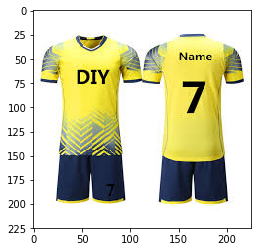

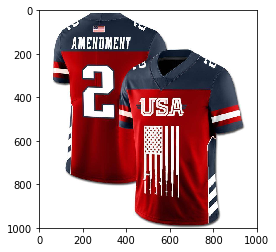

In [0]:
# 3. Load images

import os
import matplotlib.pyplot as plt
%matplotlib inline  
DEFAULT_IMAGE_FOLDER = os.path.join(yolo.PROJECT_ROOT, "tests", "dataset", "svhn", "imgs")

img_files = [os.path.join(DEFAULT_IMAGE_FOLDER, "1.png"), os.path.join(DEFAULT_IMAGE_FOLDER, "2.PNG")]

for fname in img_files:
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgs.append(img)
    plt.imshow(img)
    plt.show()

2-boxes are detected.


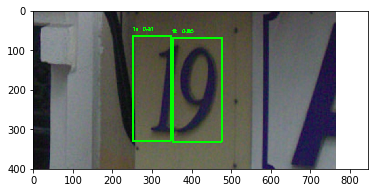

2-boxes are detected.


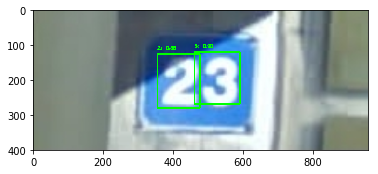

3-boxes are detected.


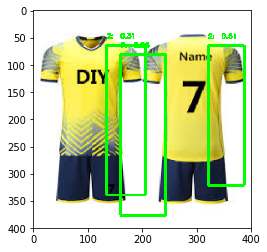

0-boxes are detected.


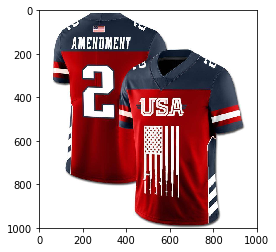

In [0]:
# 4. Predict digit region

THRESHOLD = 0.2
for img in imgs:
    boxes, probs = yolo_detector.predict(img, THRESHOLD)

    # 4. save detection result
    image = draw_scaled_boxes(img,
                              boxes,
                              probs,
                              ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])

    print("{}-boxes are detected.".format(len(boxes)))
    plt.imshow(image)
    plt.show()